**This is a tutorial for plotting pictures (semimajor axis versus time, velocity versus time.) We use WHFast tutorial from the Rebound Homepage**

Basic logics should be 

1. imposing initial conditions: stars, planets
2. set simulation: Integrator, timestep, time series.
3. store the xy and a e, then plot.

In [2]:
import rebound


# create a REBOUND simulation instance
sim = rebound.Simulation()

sim.add(m=1.)  
print(sim.particles[0])



#Any coordinate that we do not specify in the sim.add() command is assumed to be 0 we using Cartesian coordinates
sim.add(m=1e-3, x=1., vy=1.)


# initializing the particle using orbital elements
sim.add(m=1e-3, a=2., e=0.1)


# check the simulation system 
sim.status()


<rebound.particle.Particle object at 0x7fea2f8fc540, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
---------------------------------
REBOUND version:     	3.28.1
REBOUND built on:    	Sep 19 2023 21:35:28
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7fea2f8fc540, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7fea2f8fcbc0, m=0.001 x=1.0 y=0.0 z=0.0 vx=0.0 vy=1.0 vz=0.0>
<rebound.particle.Particle object at 0x7fea2f8fc540, m=0.001 x=1.800999000999001 y=0.0 z=0.0 vx=0.0 vy=0.7835163064519433 vz=0.0>
---------------------------------
The following fields have non-default values:
N:
< 0
---
> 3
rand_seed:
< 155513
---
> 154667
particles:
> (384 bytes, values not printed)



In [3]:
# use a different integrator 
sim.integrator = "whfast"
sim.dt = 1e-3


sim.integrate(6.28318530717959, exact_finish_time=0)   # 6.28318530717959 is 2*pi

sim.status()


---------------------------------
REBOUND version:     	3.28.1
REBOUND built on:    	Sep 19 2023 21:35:28
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	6.2839999999992369e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7fea2f8fc540, m=1.0 x=0.003326154866766361 y=0.009674635911450204 z=0.0 vx=0.0005194654213133196 vy=0.0012200269278386914 vz=0.0>
<rebound.particle.Particle object at 0x7fea2f8fdac0, m=0.001 x=1.0032694180883746 y=0.0366289427053581 z=0.0 vx=-0.024395944012027243 vy=0.9999782071644221 vz=0.0>
<rebound.particle.Particle object at 0x7fea2f8fc540, m=0.001 x=-1.5284252838557046 y=1.496351615582015 z=0.0 vx=-0.4950694773013606 vy=-0.4364888285516785 vz=0.0>
---------------------------------
The following fields have non-default values:
t:
< 0.000000e+00
---
> 6.284000e+00
N:
< 0
---
> 3
status:
< -1
---
> 0
exact_finish_time:
< 1
---
> 0
gravity_ignore_terms:
< 0
---
> 1
integrator:
< 0
-

In [4]:
# Print the positions and velocities 
particles = sim.particles
for p in particles:
    print(p.x, p.y, p.vx, p.vy)


0.003326154866766361 0.009674635911450204 0.0005194654213133196 0.0012200269278386914
1.0032694180883746 0.0366289427053581 -0.024395944012027243 0.9999782071644221
-1.5284252838557046 1.496351615582015 -0.4950694773013606 -0.4364888285516785


In [5]:
import numpy as np
torb = 2.*np.pi
Noutputs = 100
times = np.linspace(torb, 2.*torb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)


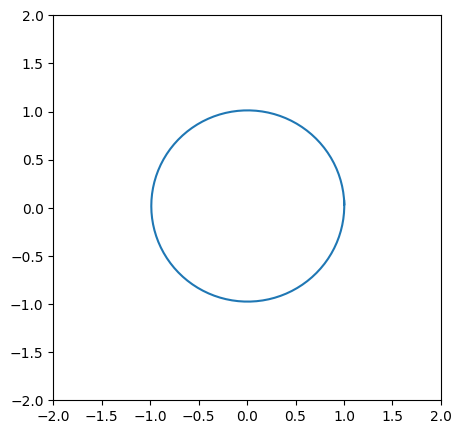

In [6]:
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    x[i] = particles[1].x
    y[i] = particles[1].y

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x, y);


In [10]:
# The center of mass, or barycenter, will have a small velocity, which results in the observed drift 
# Transform the particle coordinates to the barycentric frame. 
sim.move_to_com()


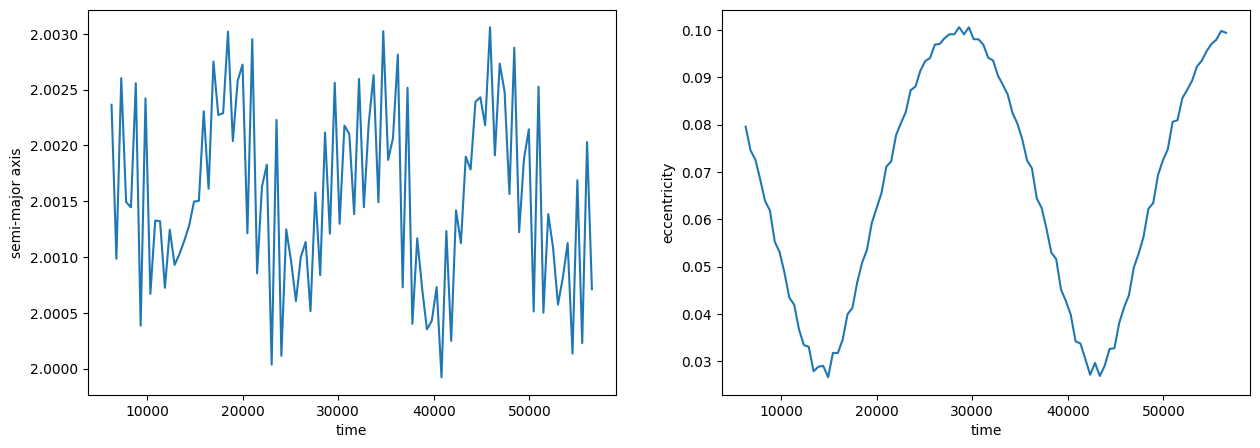

In [12]:

times = np.linspace(1000.*torb, 9000.*torb, Noutputs) #? produce a time series 
a = np.zeros(Noutputs)
e = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    a[i] = sim.particles[2].a
    e[i] = sim.particles[2].e
    
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(121)
ax.set_xlabel("time")
ax.set_ylabel("semi-major axis")
plt.plot(times, a);

ax = plt.subplot(122)
ax.set_xlabel("time")
ax.set_ylabel("eccentricity")
plt.plot(times, e);
